In [1]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib
import cv2
from training_functions import *
from testing_functions import *

%load_ext autoreload
%autoreload 2

In [2]:
### This is the main script! 
### Dataloading, training, testing

# Set training hyperparameters here
class_num = 2

In [3]:
## Data-loading
# Load from Matlab
mat_contents = io.loadmat('cups_data_{}class.mat'.format(class_num))
mat_data = mat_contents['data']
sample_num = mat_data.shape[1]
data = np.zeros([sample_num,900*1200,4])
for i in range(sample_num):
    data[i] = mat_data[0][i].astype(dtype=int)
    


In [4]:
data.shape

(73, 1080000, 4)

In [5]:
## Equalization on Train & Test Images - Preprocessing
equalized_data = equalization(data)

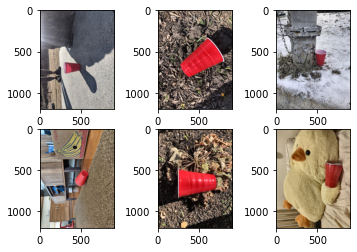

images sampled: [57 62 30 21 63 14]


In [6]:
## Show some Equalized data images

f, ax = plt.subplots(2,3)
some_images = np.random.choice(sample_num, 6, replace=False)
count = 0
for i in range(2):
    for j in range(3):
        photo = makeImage(equalized_data[some_images[count]][:,0:3])
        ax[i,j].imshow(photo)
        count += 1   
plt.show()
print('images sampled: {}'.format(some_images))

In [7]:
# Split into Train & Test
train_num = round(sample_num*0.8)
test_num = sample_num - train_num
train_index = np.sort(np.random.choice(sample_num, train_num, replace=False))
test_index = np.delete(np.arange(sample_num),train_index)
train_data = equalized_data[train_index]
test_data = equalized_data[test_index]

In [8]:
## Train
class_objs = []
class_objs = computeGaussian(train_data, class_num)

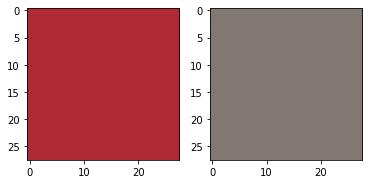

In [9]:
#### show class colors
# (1)red cup (2)dark red (3)others (4)brick red (5)pink
f, ax = plt.subplots(1,class_num)
for i in range(class_num):
    mean = class_objs[i].mean
    img = ((np.ones([28,28]))[:,:,np.newaxis]*mean).astype('int')
    ax[i].imshow(img)
    
plt.show()

In [10]:
test_index

array([ 6,  8,  9, 16, 23, 24, 33, 37, 45, 50, 61, 62, 63, 69, 72])

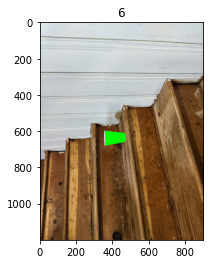

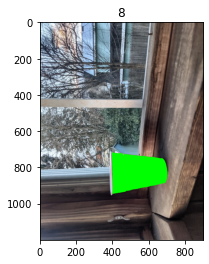

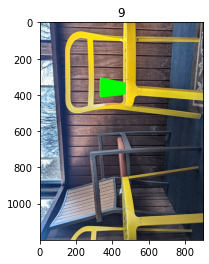

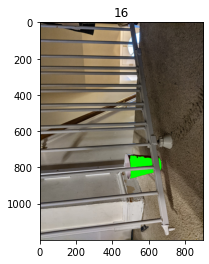

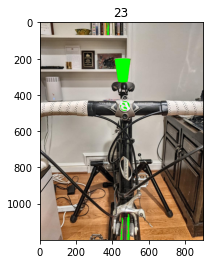

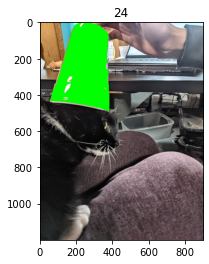

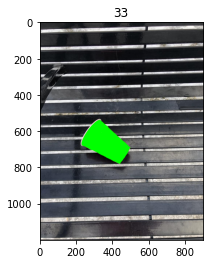

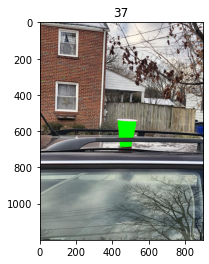

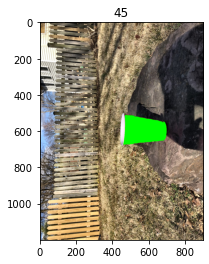

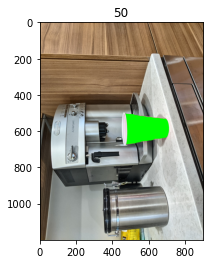

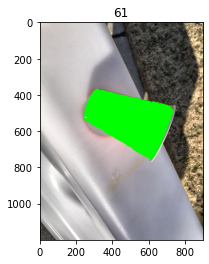

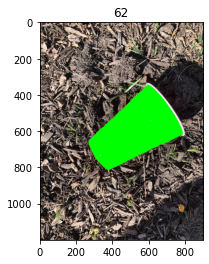

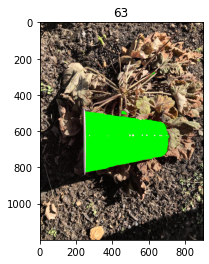

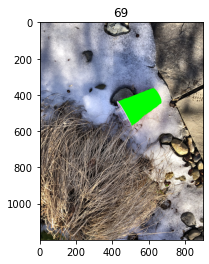

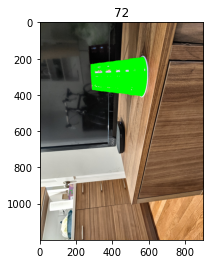

In [11]:
## Testing
estimates_allimages = []
binary_images = []

estimates_allimages = getPixelEstimates(test_data, class_num, class_objs)
binary_images = showGreenImages_getBinaryImages(test_data, test_index, estimates_allimages)

image 0
0.7920281137151658
image 1
0.7729999260784742
image 2
0.8083333279872135
image 3
0.7750397863732597
image 4
0.7836452693079745
image 5
0.7174271053195885
image 6
0.7974425783691096
image 7
0.8451276618538024
image 8
0.7761767511068445
image 9
0.7462089466409748
image 10
0.7537973371997274
image 11
0.7644109893319119
image 12
0.737352046609306
image 13
0.770535165839342
image 14
0.8079144947710669


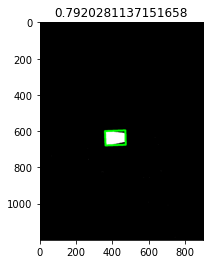

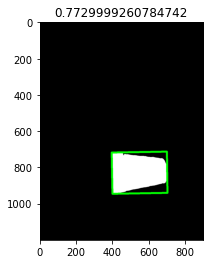

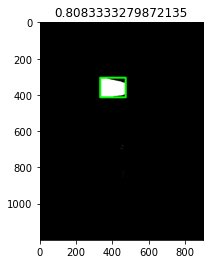

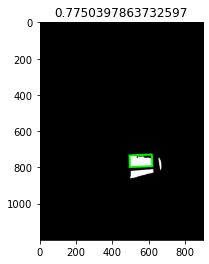

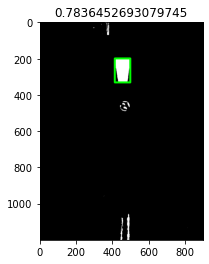

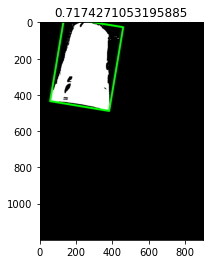

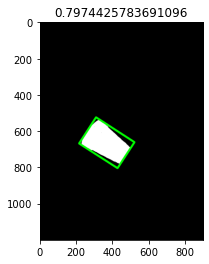

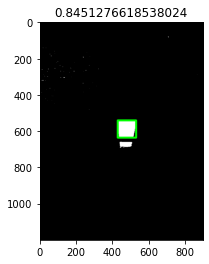

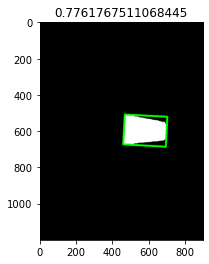

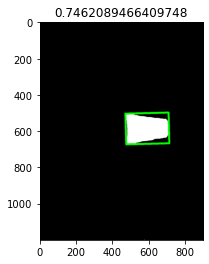

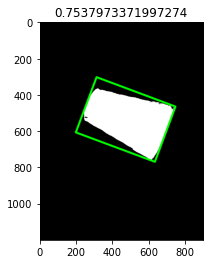

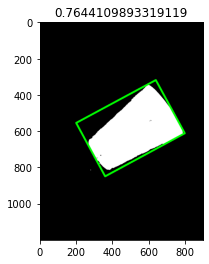

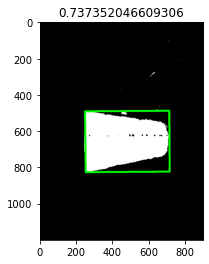

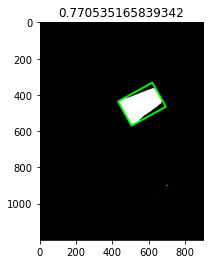

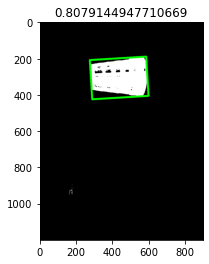

In [12]:
extent_clip = 0.55
showBoundingBox(binary_images, extent_clip)